In [6]:
from astropy.io import fits
import h5py
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
# # short dipole (Anze)
# phi = np.linspace(0, 2*np.pi, 360, endpoint=False)
# theta = np.linspace(0, np.pi/2, 91)
# P, T = np.meshgrid(phi, theta)
# x = np.sin(T) * np.cos(P)
# Ax = np.sqrt(1 - x**2)
# E_theta = Ax * np.cos(P)
# E_phi = Ax * np.sin(P)

# short_X = np.array([E_theta, E_phi])
# short_Y = np.roll(short_X, 90, axis=-1)

In [20]:
# short dipole (Christian)
phi = np.linspace(0, 2*np.pi, 360, endpoint=False)
theta = np.linspace(0, np.pi/2, 91)
P, T = np.meshgrid(phi, theta)

E_theta = -np.cos(T) * np.cos(P)
E_phi = np.sin(P)

short_X = np.array([E_theta, E_phi])
short_Y = np.roll(short_X, 90, axis=-1)

In [21]:
# lusee beam
def read_beam(fname):
    with fits.open(fname) as hdul:
        E_theta = hdul["Etheta_real"].data + 1j * hdul["Etheta_imag"].data
        E_phi = hdul["Ephi_real"].data + 1j * hdul["Ephi_imag"].data
        ix = np.argwhere(hdul["freq"].data == 1)[0, 0]
        E_theta = E_theta[ix]
        E_phi = E_phi[ix]

    lusee_Y = np.array([E_theta, E_phi])[:, :, :-1]
    lusee_Y /= np.abs(lusee_Y).max(axis=(1,2))[:, None, None]
    return lusee_Y
    
hfss = read_beam("hfss_lbl_3m_75deg.2port.fits")
feko = read_beam("feko_bnl_3m_75deg.2port.fits")

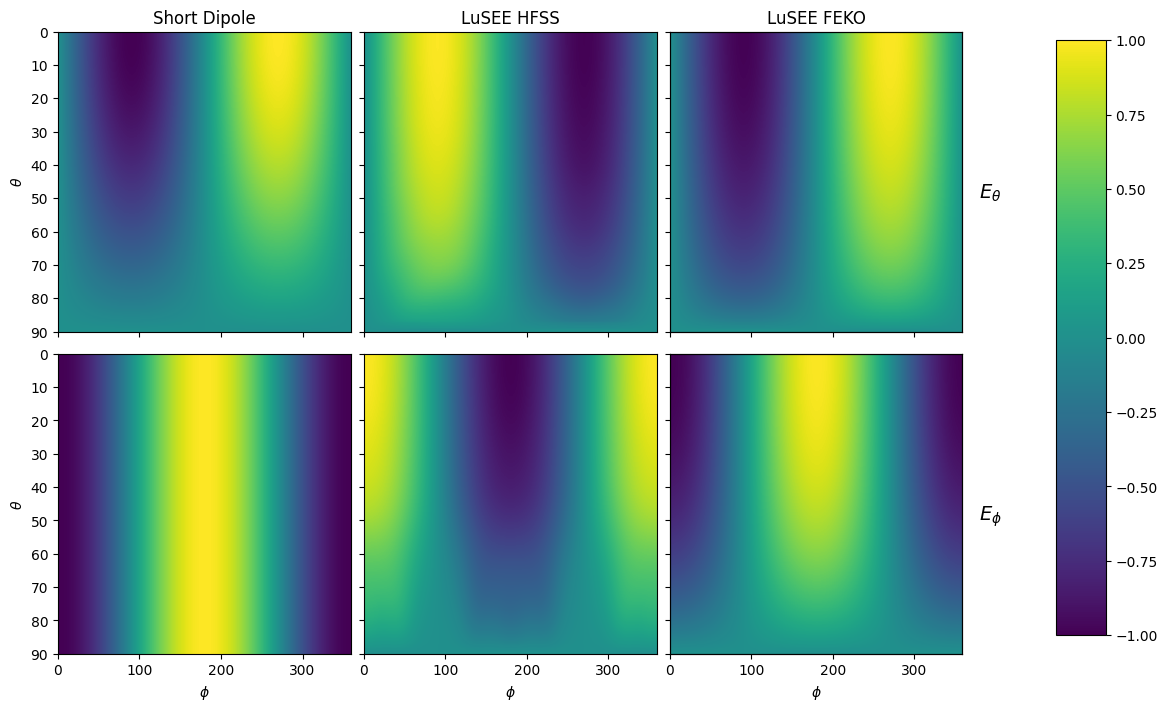

In [22]:
fig, axs = plt.subplots(figsize=(10, 7), nrows=2, ncols=3, sharex=True, sharey=True, layout="constrained")
extent = np.rad2deg([phi.min(), phi.max(), theta.max(), theta.min()])
kwargs = {"extent": extent, "aspect": "auto", "vmin": -1, "vmax": 1}
for i in range(2):
    im = axs[i, 0].imshow(short_Y[i], **kwargs)
    im = axs[i, 1].imshow(hfss[i].real, **kwargs)
    im = axs[i, 2].imshow(feko[i].real, **kwargs)

cbar_ax = fig.add_axes([1.05, 0.1, 0.05, .85])
fig.colorbar(im, cax=cbar_ax)    
    
axt = axs[0, -1].twinx()
axt.set_ylabel("$E_{\\theta}$", fontsize=14, rotation=0, labelpad=20)
axt.set_yticks([])
axp = axs[1, -1].twinx()
axp.set_ylabel("$E_{\\phi}$", fontsize=14, rotation=0, labelpad=20)
axp.set_yticks([])
axs[0, 0].set_title("Short Dipole")
axs[0, 1].set_title("LuSEE HFSS")
axs[0, 2].set_title("LuSEE FEKO")
plt.setp(axs[:, 0], ylabel="$\\theta$")
plt.setp(axs[-1], xlabel="$\\phi$")
plt.show()

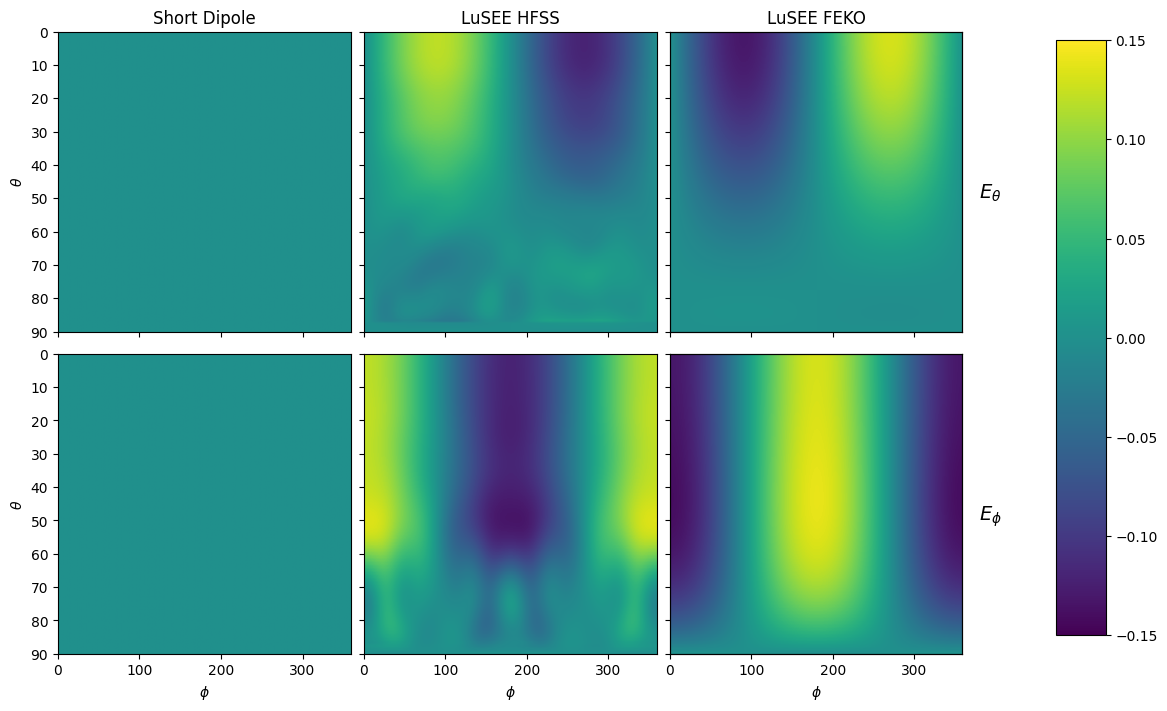

In [23]:
fig, axs = plt.subplots(figsize=(10, 7), nrows=2, ncols=3, sharex=True, sharey=True, layout="constrained")
kwargs["vmin"] = -0.15
kwargs["vmax"] = 0.15
for i in range(2):
    im = axs[i, 0].imshow(short_Y[i].imag, **kwargs)
    im = axs[i, 1].imshow(hfss[i].imag, **kwargs)
    im = axs[i, 2].imshow(feko[i].imag, **kwargs)

cbar_ax = fig.add_axes([1.05, 0.1, 0.05, .85])
fig.colorbar(im, cax=cbar_ax)    
    
axt = axs[0, -1].twinx()
axt.set_ylabel("$E_{\\theta}$", fontsize=14, rotation=0, labelpad=20)
axt.set_yticks([])
axp = axs[1, -1].twinx()
axp.set_ylabel("$E_{\\phi}$", fontsize=14, rotation=0, labelpad=20)
axp.set_yticks([])
axs[0, 0].set_title("Short Dipole")
axs[0, 1].set_title("LuSEE HFSS")
axs[0, 2].set_title("LuSEE FEKO")
plt.setp(axs[:, 0], ylabel="$\\theta$")
plt.setp(axs[-1], xlabel="$\\phi$")
plt.show()

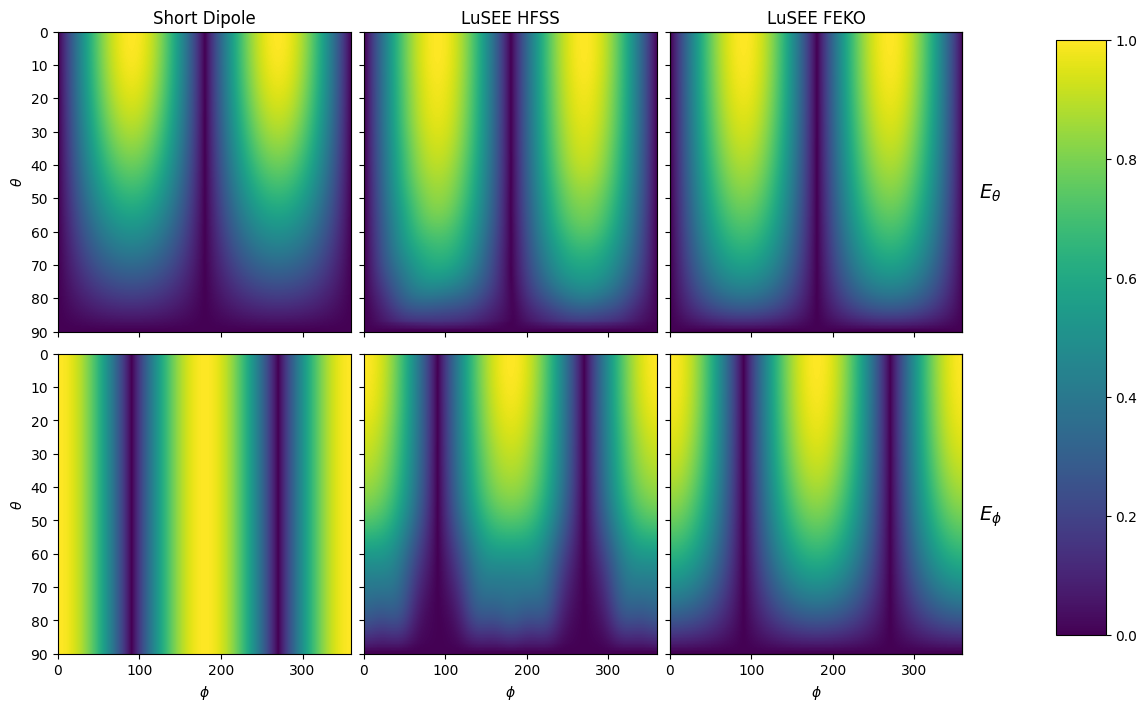

In [24]:
fig, axs = plt.subplots(figsize=(10, 7), nrows=2, ncols=3, sharex=True, sharey=True, layout="constrained")
kwargs["vmin"] = 0
kwargs["vmax"] = 1
for i in range(2):
    im = axs[i, 0].imshow(np.abs(short_Y[i]), **kwargs)
    im = axs[i, 1].imshow(np.abs(hfss[i]), **kwargs)
    im = axs[i, 2].imshow(np.abs(feko[i]), **kwargs)

cbar_ax = fig.add_axes([1.05, 0.1, 0.05, .85])
fig.colorbar(im, cax=cbar_ax)    
    
axt = axs[0, -1].twinx()
axt.set_ylabel("$E_{\\theta}$", fontsize=14, rotation=0, labelpad=20)
axt.set_yticks([])
axp = axs[1, -1].twinx()
axp.set_ylabel("$E_{\\phi}$", fontsize=14, rotation=0, labelpad=20)
axp.set_yticks([])
axs[0, 0].set_title("Short Dipole")
axs[0, 1].set_title("LuSEE HFSS")
axs[0, 2].set_title("LuSEE FEKO")
plt.setp(axs[:, 0], ylabel="$\\theta$")
plt.setp(axs[-1], xlabel="$\\phi$")
plt.show()

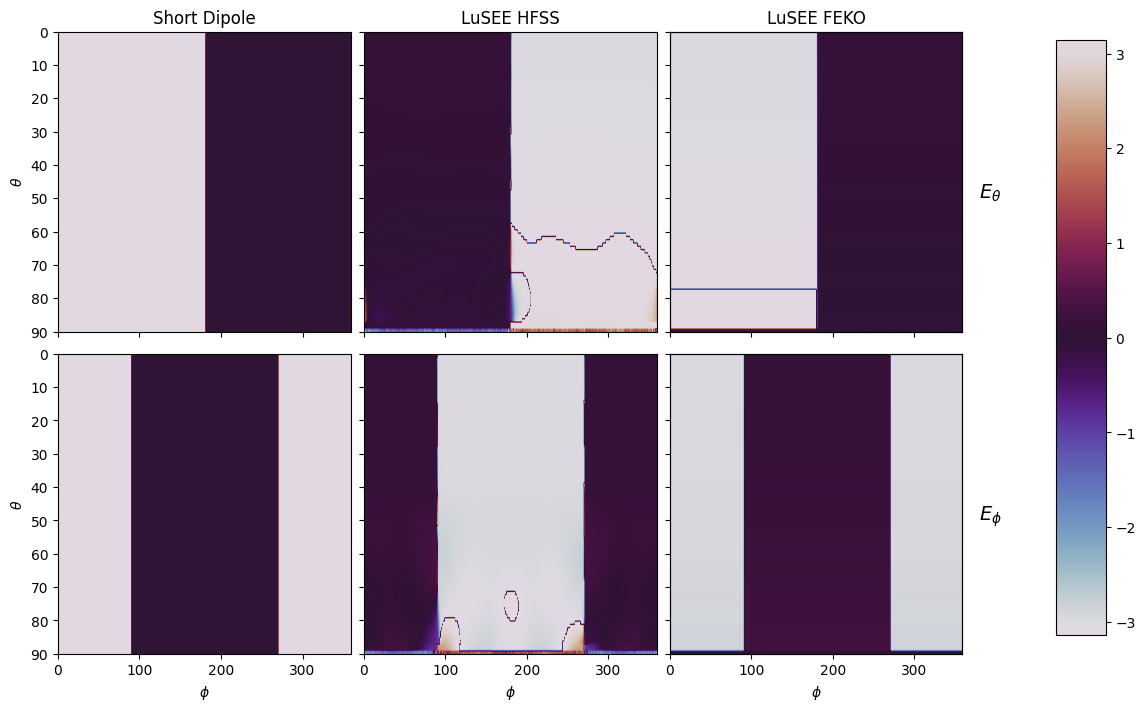

In [25]:
fig, axs = plt.subplots(figsize=(10, 7), nrows=2, ncols=3, sharex=True, sharey=True, layout="constrained")
kwargs["vmin"] = -np.pi
kwargs["vmax"] = np.pi
kwargs["cmap"] = "twilight"
for i in range(2):
    im = axs[i, 0].imshow(np.angle(short_Y[i]), **kwargs)
    im = axs[i, 1].imshow(np.angle(hfss[i]), **kwargs)
    im = axs[i, 2].imshow(np.angle(feko[i]), **kwargs)

cbar_ax = fig.add_axes([1.05, 0.1, 0.05, .85])
fig.colorbar(im, cax=cbar_ax)    
    
axt = axs[0, -1].twinx()
axt.set_ylabel("$E_{\\theta}$", fontsize=14, rotation=0, labelpad=20)
axt.set_yticks([])
axp = axs[1, -1].twinx()
axp.set_ylabel("$E_{\\phi}$", fontsize=14, rotation=0, labelpad=20)
axp.set_yticks([])
axs[0, 0].set_title("Short Dipole")
axs[0, 1].set_title("LuSEE HFSS")
axs[0, 2].set_title("LuSEE FEKO")
plt.setp(axs[:, 0], ylabel="$\\theta$")
plt.setp(axs[-1], xlabel="$\\phi$")
plt.show()